In [2]:
import os

img_dir = r"data/ShanghaiTech/part_A/train_data/images"
gt_dir  = r"data/ShanghaiTech/part_A/train_data/ground-truth"

imgs = sorted([f for f in os.listdir(img_dir) if f.endswith('.jpg')])
gts  = sorted([f for f in os.listdir(gt_dir)  if f.endswith('.mat')])

print("Images:", len(imgs), "GT files:", len(gts))

for img in imgs[:5]:
    gt = "GT_" + os.path.splitext(img)[0] + ".mat"
    assert os.path.exists(os.path.join(gt_dir, gt)), f"Missing {gt}"
print("All checked.")

Images: 300 GT files: 300
All checked.


In [4]:
import scipy.io

mat_path = r"data/ShanghaiTech/part_A/train_data/ground-truth/GT_IMG_1.mat"

data = scipy.io.loadmat(mat_path)

print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'image_info'])


In [5]:
points = data["image_info"][0,0][0,0][0]
print("Shape:", points.shape)
print(points[:5]) 
print("Total people in this image:", len(points))

Shape: (1546, 2)
[[ 29.6225116  472.92022152]
 [ 54.35533603 454.96602305]
 [ 51.79045053 460.46220626]
 [ 51.79045053 465.77518336]
 [ 50.87442    473.65304595]]
Total people in this image: 1546


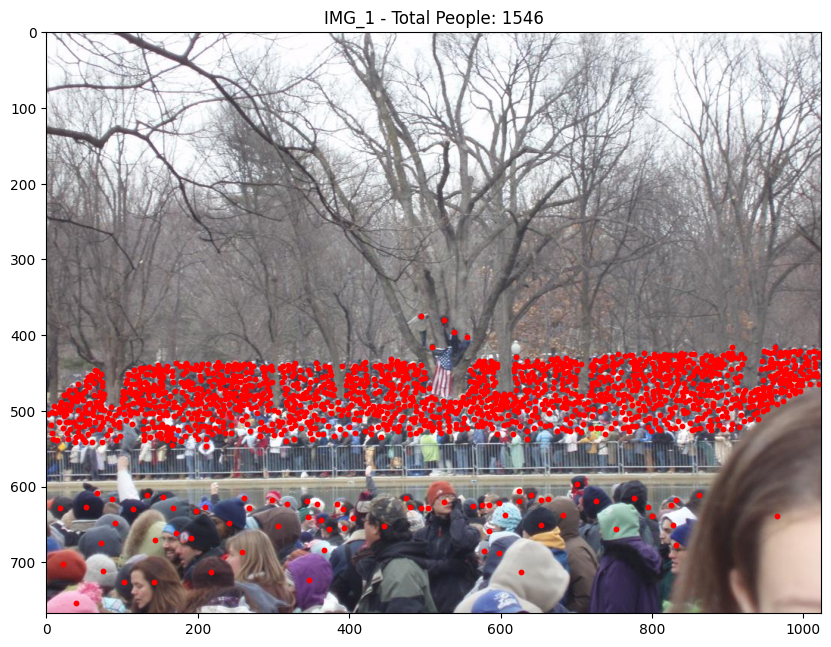

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img_path = r"data/ShanghaiTech/part_A/train_data/images/IMG_1.jpg"
mat_path = r"data/ShanghaiTech/part_A/train_data/ground-truth/GT_IMG_1.mat"

img = np.array(Image.open(img_path))

data = scipy.io.loadmat(mat_path)
points = data["image_info"][0,0][0,0][0]

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.scatter(points[:,0], points[:,1], s=10, c='red')
plt.title(f"IMG_1 - Total People: {len(points)}")
plt.show()

In [7]:
import numpy as np
from PIL import Image

img_dir = r"data/ShanghaiTech/part_A/train_data/images"
gt_dir  = r"data/ShanghaiTech/part_A/train_data/ground-truth"

counts = []
sizes = []

for img_name in os.listdir(img_dir):
    if not img_name.endswith('.jpg'):
        continue

    img_path = os.path.join(img_dir, img_name)
    gt_path  = os.path.join(gt_dir, "GT_" + os.path.splitext(img_name)[0] + ".mat")

    # Load ground truth
    data = scipy.io.loadmat(gt_path)
    points = data["image_info"][0,0][0,0][0]
    counts.append(len(points))

    with Image.open(img_path) as im:
        sizes.append(im.size) 

counts = np.array(counts)
widths, heights = zip(*sizes)

print(f"Total images: {len(counts)}")
print(f"Min crowd count: {counts.min()}")
print(f"Max crowd count: {counts.max()}")
print(f"Average crowd count: {counts.mean():.2f}")
print(f"Average image size: {np.mean(widths):.0f}×{np.mean(heights):.0f}")

Total images: 300
Min crowd count: 33
Max crowd count: 3138
Average crowd count: 541.38
Average image size: 872×598


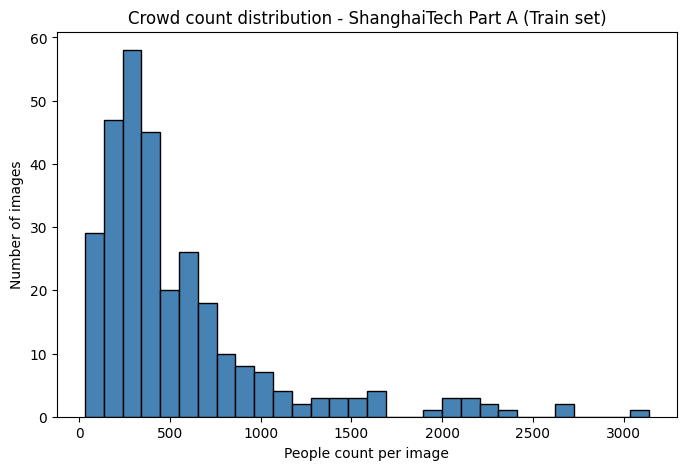

In [8]:
plt.figure(figsize=(8,5))
plt.hist(counts, bins=30, color='steelblue', edgecolor='black')
plt.xlabel("People count per image")
plt.ylabel("Number of images")
plt.title("Crowd count distribution - ShanghaiTech Part A (Train set)")
plt.show()

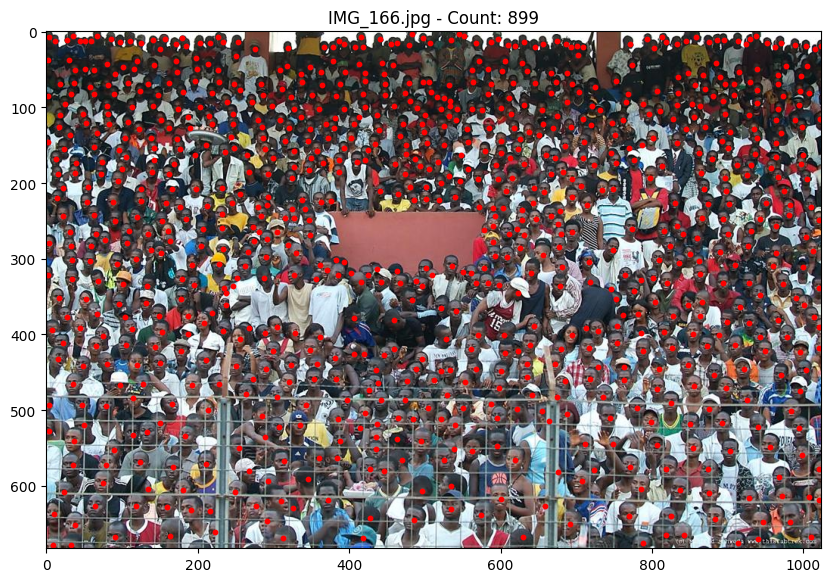

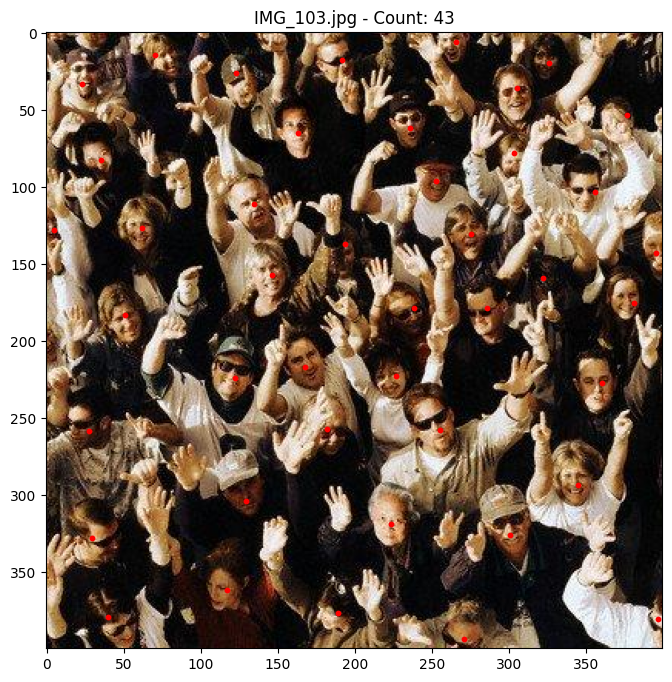

In [10]:
import random
for img_name in random.sample(imgs, 2):
    img_path = os.path.join(img_dir, img_name)
    gt_path  = os.path.join(gt_dir, "GT_" + os.path.splitext(img_name)[0] + ".mat")
    data = scipy.io.loadmat(gt_path)
    points = data["image_info"][0,0][0,0][0]

    img = np.array(Image.open(img_path))
    plt.figure(figsize=(10,8))
    plt.imshow(img)
    plt.scatter(points[:,0], points[:,1], s=10, c='red')
    plt.title(f"{img_name} - Count: {len(points)}")
    plt.show()